## Regressão Linear para o pH

In [3]:
#!pip install statsmodels
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Coletando os dados
df_reservatorio = pd.read_csv('clorofila.csv', sep=',')

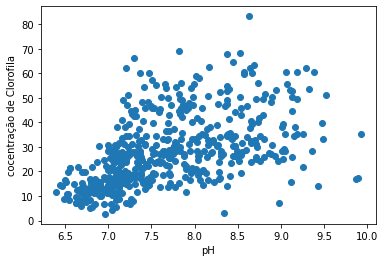

In [5]:
# Plotando PH VS Clorofila
plt.scatter(df_reservatorio['pH'] , df_reservatorio['Clorofila'])
plt.xlabel('pH')
plt.ylabel('cocentração de Clorofila')
plt.show()

 Aparentemente temos uma correlação linear entre as duas variaveis

In [10]:
# Vamos definir o x (preditor)
X = df_reservatorio['pH']
Y = df_reservatorio['Clorofila']

Por default, o Statsmodels ajusta uma reta que começa na origem, no ponto (0,0). Mas não queremos isso! Para ajustar a regressão vamos adicionar a seguinte linha de código

In [11]:
X = sm.add_constant(X)

Agora iremos criar nosso modelo.

In [12]:
# Descobrindo Betas
modelo_linear_ph = sm.OLS(Y , X)
modelo_linear_ph = modelo_linear_ph.fit()

In [14]:
# usando model.summary( ) para coletar insights
print_model = modelo_linear_ph.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              Clorofila   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     200.9
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.08e-38
Time:                        23:01:23   Log-Likelihood:                -2013.2
No. Observations:                 512   AIC:                             4030.
Df Residuals:                     510   BIC:                             4039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -52.6095      5.710     -9.214      0.0

Note que o coeficiente linear (beta 0) é -52.6095 e coeficiente angular (beta 1) é 10.4960

Do resumo acima, podemos ver também o R2 do modelo que resultou em 28.3%

Vamos calcular as métricas de erro para nosso ajuste?

## Métricas de Erro

primeiro vamos gerar as previsões a partir do nosso modelo.

In [15]:
predictions = modelo_linear_ph.predict(X)
predictions

0      25.795602
1      19.812885
2      18.658326
3      21.912084
4      22.122004
         ...    
507    16.139288
508    17.608727
509    18.658326
510    17.293847
511    16.978967
Length: 512, dtype: float64

### Mean Squared Error

In [16]:
mse = np.mean((Y-predictions)**2)
mse

152.3294648859772

### Mean Absolute Error

In [18]:
mae = np.mean(abs(Y-predictions))

In [19]:
# erro médio absoluto
mae

9.610649175051625

In [20]:
# média do target
np.mean(Y)

27.960195312500005

Em média o modelo erra, para mais ou para menos, 9.6 unidades de clorofila. 

### Mean Absolute Percentage Error

In [21]:
mape = 100*np.mean(abs(Y-predictions)/Y)

In [22]:
mape

47.181299787519364

Em média nosso modelo erra 47.2% para mais ou para menos.